In [1]:
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn import metrics

In [4]:
data_diabetes = pd.read_csv('Diabetes.csv', encoding='utf-8', delimiter=';')
data_diabetes.head()
# target(has diabetes? ):yes = 1, no = 0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,336,627,50,1
1,1,85,66,29,0,266,351,31,0
2,8,183,64,0,0,233,672,32,1
3,1,89,66,23,94,281,167,21,0
4,0,137,40,35,168,431,2288,33,1


## Draw the pairplot to see the relations:

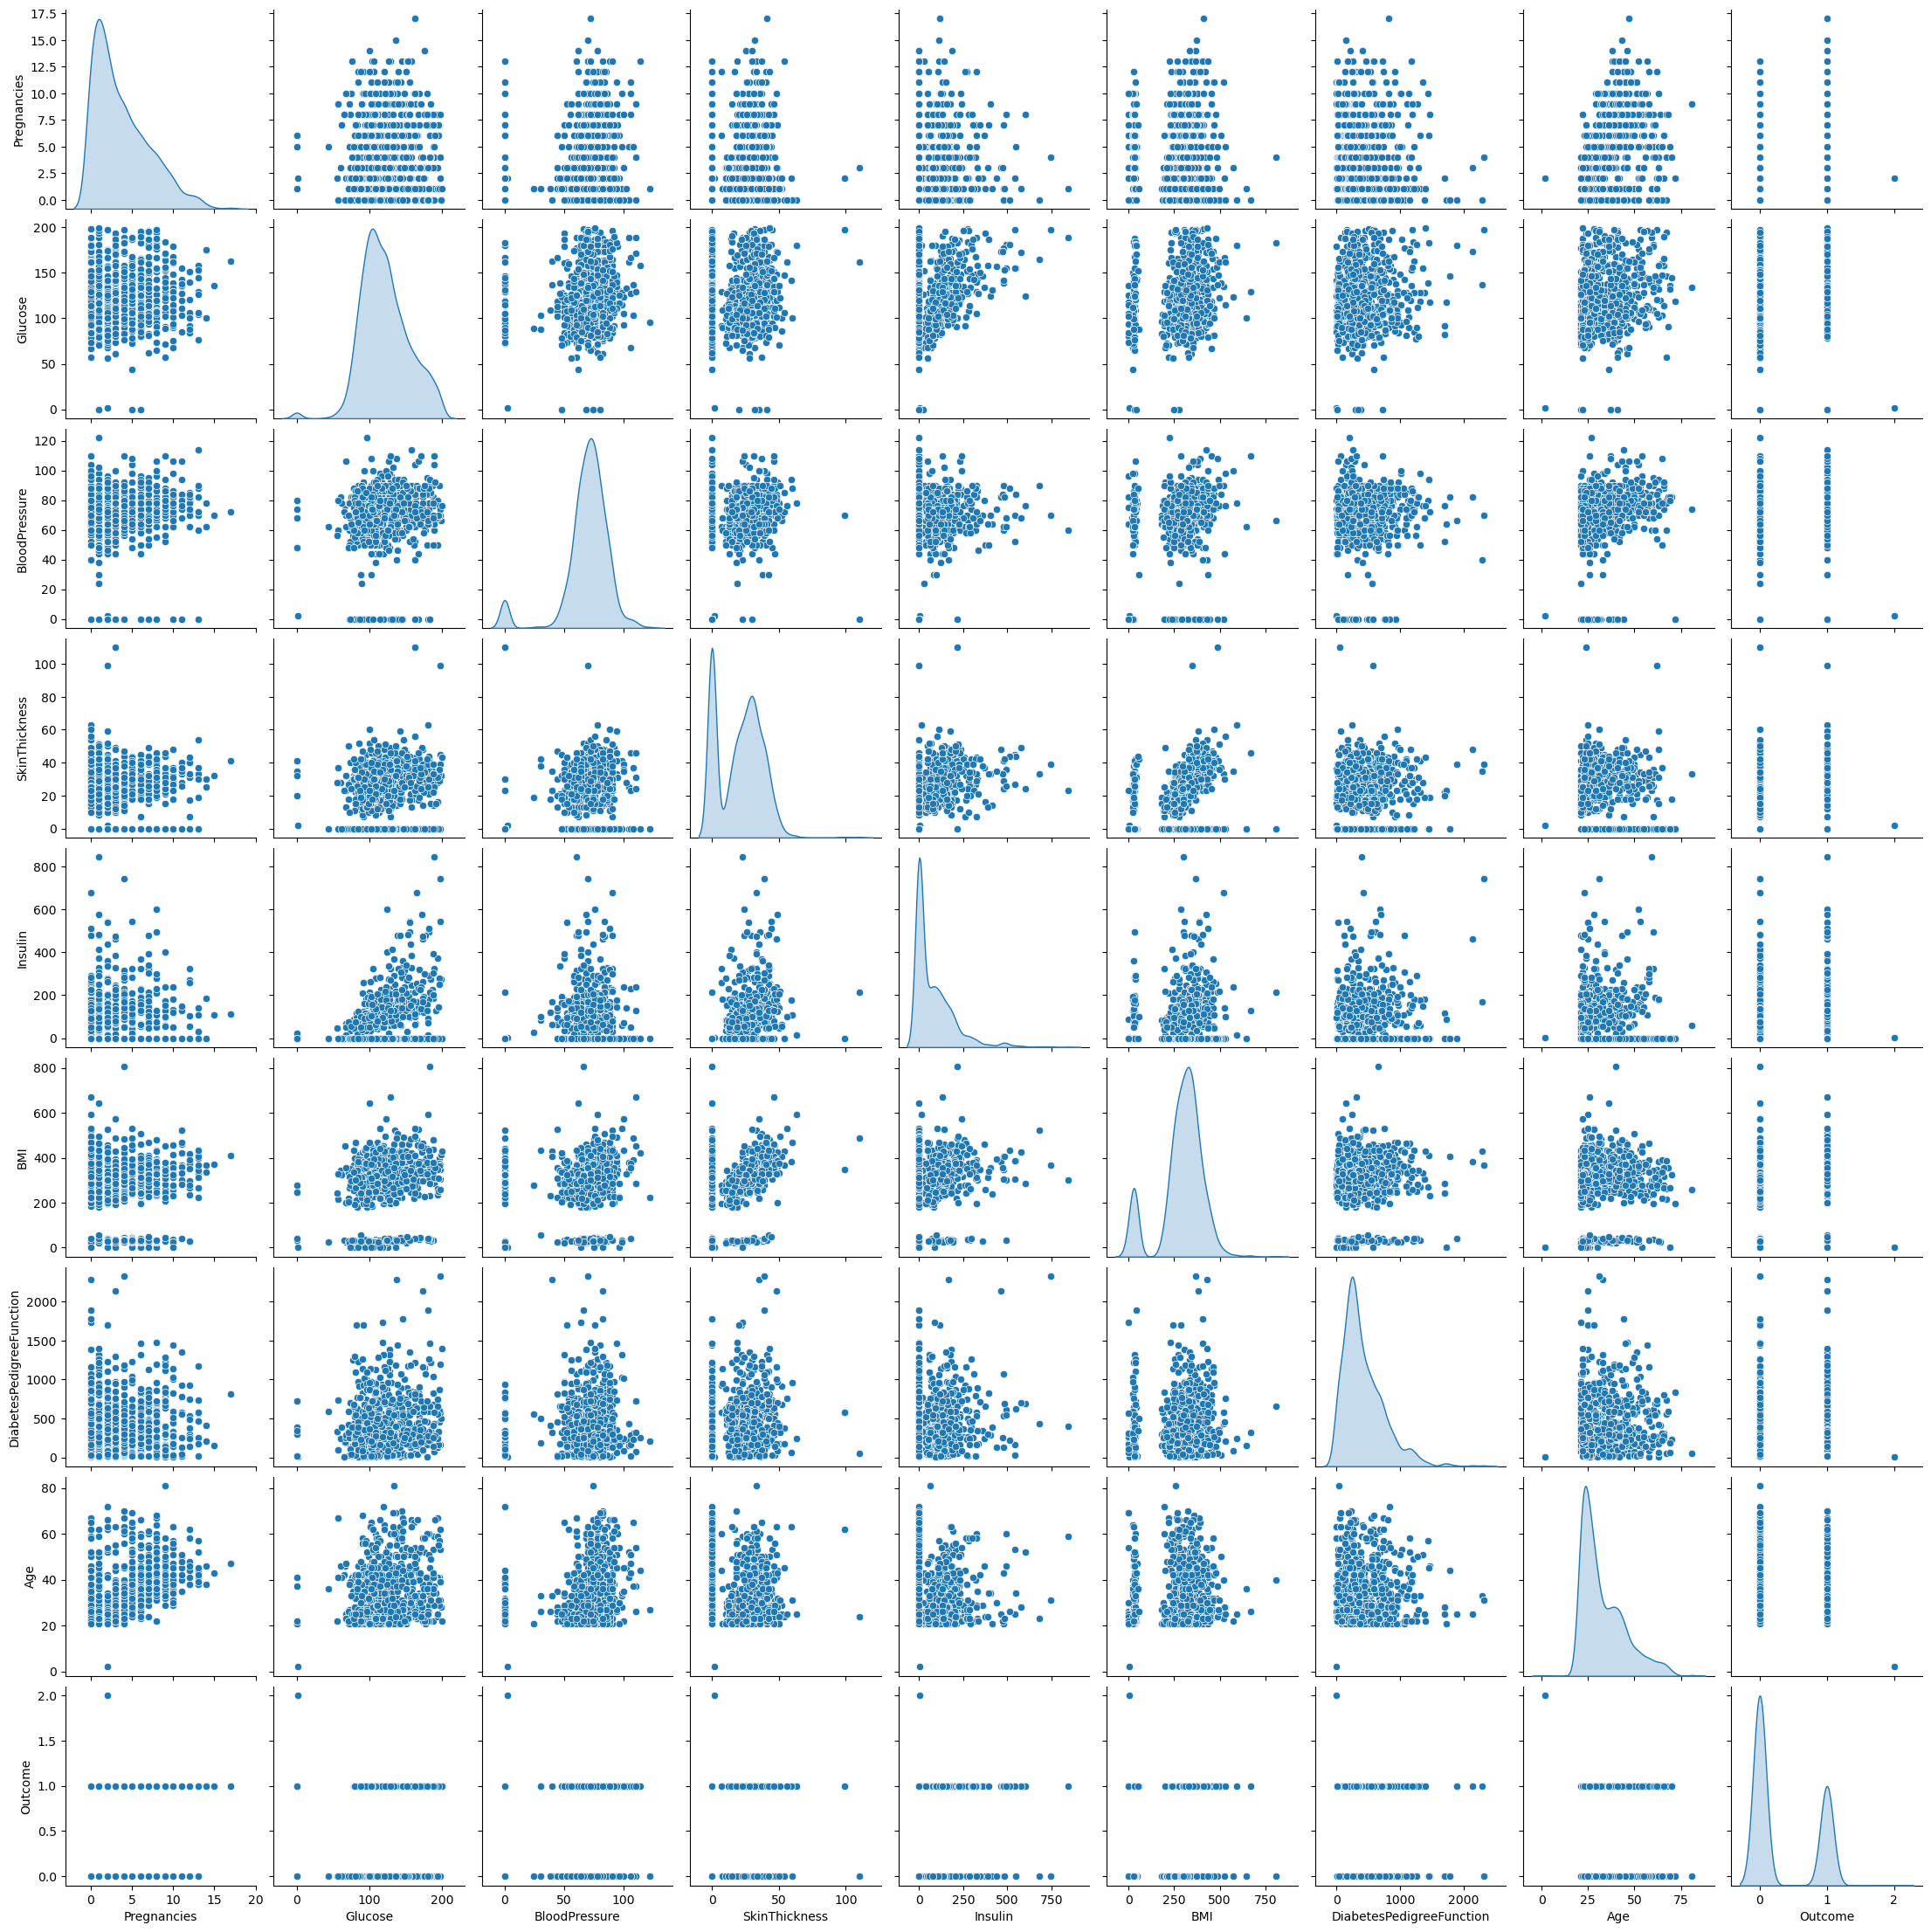

In [10]:
sn.pairplot(data_diabetes,diag_kind='kde')
plt.show()

Insights:
- It has no linear relations between target and over features.
- We will drop rows that have value '2' from 'Outcome' column.
  

## Drop value '2' from Outcome columne:

In [15]:
data_diabetes = data_diabetes[data_diabetes['Outcome'] != 2]
data_diabetes['Outcome'].value_counts()

Outcome
0    1816
1     951
Name: count, dtype: int64

## Start Train the model:

steps:
- split the data.
- standaraization the features.
- create the model and train it.
- evaluate the result.

**Iditional step**
- Becouse our the daa is non-linear, we will use 'rbf' kernel with deffirent c and gamma to find the best tunning for the model.
  

In [16]:
#split the data:
x = data_diabetes.drop(columns='Outcome')
y = data_diabetes['Outcome']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=23)
print(f'train shape: {x_train.shape} -- test shape: {x_test.shape}')

train shape: (2213, 8) -- test shape: (554, 8)


In [17]:
#standarizing the data:
standard = StandardScaler()
x_train_std = standard.fit_transform(x_train)
x_test_std = standard.transform(x_test)

In [18]:
# Create and Train the model:
model = svm.SVC(kernel='linear')

model.fit(x_train_std, y_train)

SVC(kernel='linear')

In [23]:
# Make predictions and evaluate the accuracy:
predictions = model.predict(x_test_std)

print('Accuracy: ',metrics.accuracy_score(y_test, predictions))

Accuracy:  0.796028880866426


## Fine-tuning:

 Using **rbf** kernel (for non-linear classifications which use kernel trick)

In [27]:

# 1. import GridSearchCV:
from sklearn.model_selection import GridSearchCV
# 2. write grid parameters that want to change:
grid_param = {'kernel' : ['rbf'],'C' : [0.1, 1, 10, 100, 1000], 'gamma' : [10, 1, 0.1, 0.01, 0.001]}
# 3. create the model:
best_model = GridSearchCV(svm.SVC(),grid_param,refit=True,verbose=2)
# 4. train the model:
best_model.fit(x_train_std, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.2s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.2s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.1s
[CV] END ........................C=0.1, gamma=10, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.1, kernel=rbf; total time=   0.1s
[CV] END .......................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=2)

In [28]:
# Find the best model:
print(best_model.best_estimator_)

SVC(C=10, gamma=1)


In [29]:
# Evaluate the accuracy for the best estimator in the model:
best_prediction = best_model.predict(x_test_std)
print('Accuracy: ',metrics.accuracy_score(y_test, best_prediction))

Accuracy:  0.9909747292418772


In [71]:
# New predict with random values that aren't in dataset:
random_val = np.array([[0, 120, 90, 5, 110, 21.01, 0.537, 18]])
best_model.predict(random_val)

array([0])

## Draw the scatter plot for classification:

we'll use just 2 features: BMI and Insulin.

In [62]:
# create the DateFrame:
ins = x_test['Insulin'].values
bmi = x_test['BMI'].values
df_chart = pd.DataFrame({'BMI' : bmi, 'Insulin' : ins, 'Real_outcome' : y_test.values, 'Predict_outcome' : best_prediction})
df_chart.head()

,BMI,Insulin,Real_outcome,Predict_outcome
0,366,0,0,0
1,0,0,0,0
2,385,71,0,0
3,312,0,0,0
4,29,53,0,0


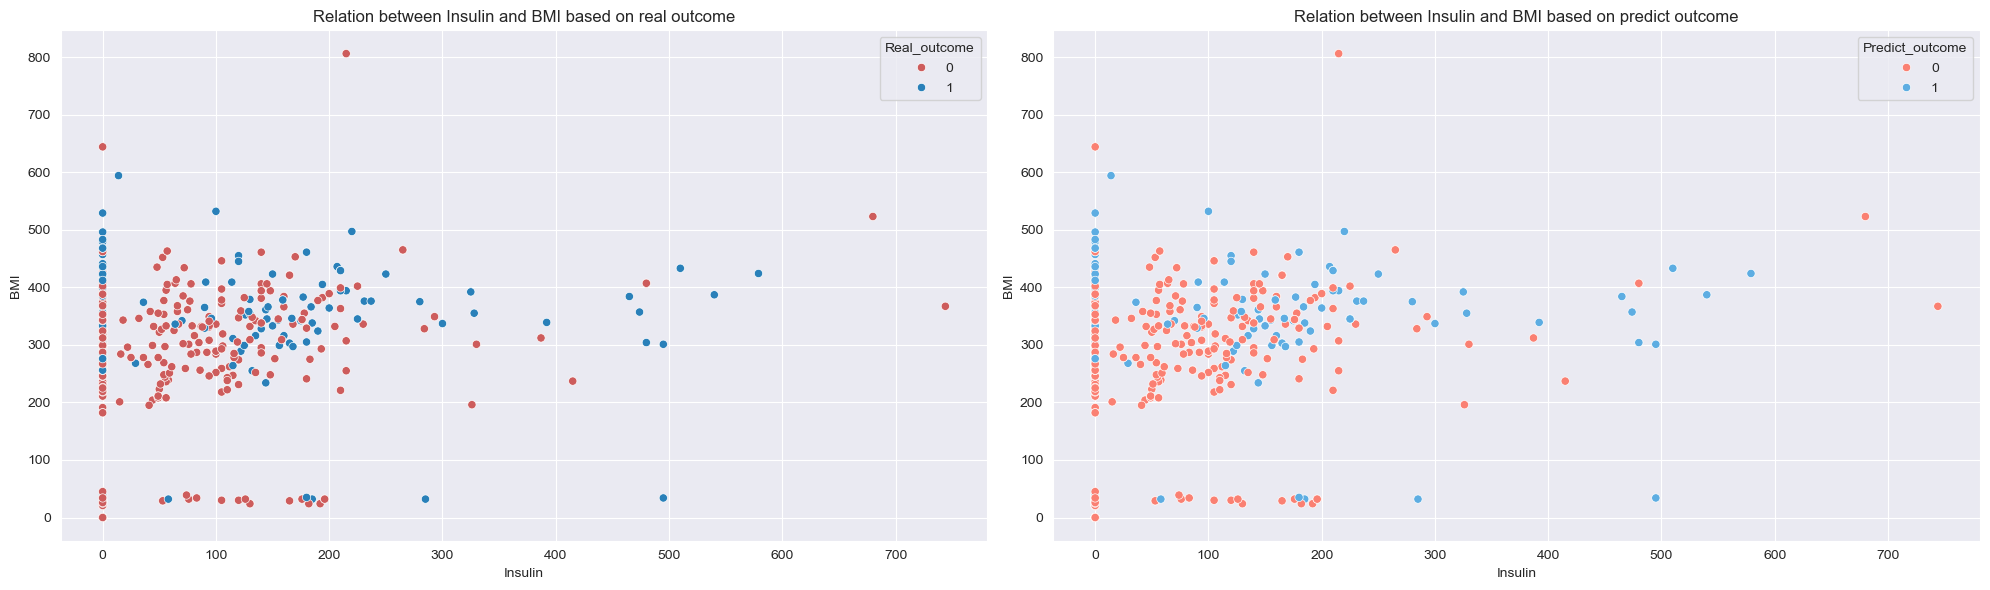

In [63]:
# draw two charts:

plt.figure(figsize=(20,6))
sn.set_style('darkgrid')

plt.subplot(1,2,1)
sn.scatterplot(data=df_chart, x='Insulin', y='BMI', hue='Real_outcome', palette=['#CD5C5C', '#2980b9'])
plt.title('Relation between Insulin and BMI based on real outcome')
plt.xlabel('Insulin')
plt.ylabel('BMI')

plt.subplot(1,2,2)
sn.scatterplot(data=df_chart, x='Insulin', y='BMI', hue='Predict_outcome', palette=['#FA8072', '#5dade2'])
plt.title('Relation between Insulin and BMI based on predict outcome')
plt.xlabel('Insulin')
plt.ylabel('BMI')

plt.tight_layout()
plt.show()

insights:
- From the graphs we see that the accuracy prediection of our model is more than 95%.
- It prediect well, and captured the the right class well.